# Regression Graphs

Here we will be making graphs for each regression that will show the apparent discontinuity before meme and after meme. We will be creating 18 graphs, 6 (one per meme) for each data source: Twitter Sentiment, Tweet Volume, FEC contributions

In [1]:
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
import numpy as np

In [38]:
## for lines on scatter we will make line of best fits for each half of the data using numpy
def make_line_best_fit(X, Y):
    X = np.linspace(0,1,len(X))
    coeffs = np.polyfit(X, Y, 1)
    poly_eqn = np.poly1d(coeffs)
    y_hat = poly_eqn(X)

    return y_hat

def create_graph(df,x_col, y_col, meme_peak, labels):
    X = df[df[x_col] <= meme_peak][x_col]
    Y = df[df[x_col] <= meme_peak][y_col]
    y_hat = make_line_best_fit(X,Y)

    X_ = df[df[x_col] >= meme_peak][x_col]
    Y_ = df[df[x_col] >= meme_peak][y_col]
    y_hat_ = make_line_best_fit(X_, Y_)

    fig = plt.figure(figsize=(18, 6), dpi=80)
    plt.scatter(df[x_col], df[y_col])
    plt.plot(X, y_hat)
    plt.plot(X_, y_hat_)
    plt.axvline(x=meme_peak, color = 'r')

    label_plt(plt, labels['y_label'], labels['title'], labels['legend'])
    
    return fig

def label_plt(plt, y_label, title, legend):
    plt.ylabel(y_label)
    plt.xlabel("Date")
    plt.title(title)
    plt.legend(legend)
    

In [18]:
fec_barnie_sandlers = pd.read_csv("data/fec_barnie_sandlers.csv", parse_dates=['TRANSACTION_DT'])
fec_bird_on_podium = pd.read_csv("data/fec_bird_on_podium.csv", parse_dates=['TRANSACTION_DT'])
fec_feel_the_bern = pd.read_csv("data/fec_feel_the_bern.csv",  parse_dates=['TRANSACTION_DT'])
fec_look_alike = pd.read_csv("data/fec_look_alike.csv", parse_dates=['TRANSACTION_DT'])
fec_zodiac_killer_1 = pd.read_csv("data/fec_zodiac_killer_1.csv", parse_dates=['TRANSACTION_DT'])
fec_zodiac_killer_2 = pd.read_csv("data/fec_zodiac_killer_2.csv", parse_dates=['TRANSACTION_DT'])

twitter_barnie_sandlers = pd.read_csv("data/twitter_barnie_sandlers.csv", parse_dates=['created_at'])
twitter_bird_on_podium = pd.read_csv("data/twitter_bird_on_podium.csv", parse_dates=['created_at'])
twitter_feel_the_bern = pd.read_csv("data/twitter_feel_the_bern.csv", parse_dates=['created_at'])
twitter_look_alike = pd.read_csv("data/twitter_look_alike.csv", parse_dates=['created_at'])
twitter_zodiac_killer_1 = pd.read_csv("data/twitter_zodiac_killer_1.csv", parse_dates=['created_at'])
twitter_zodiac_killer_2 = pd.read_csv("data/twitter_zodiac_killer_2.csv", parse_dates=['created_at'])

volume_barnie_sandlers = pd.read_csv("data/volume_barnie_sandlers.csv", parse_dates=['start'])
volume_bird_on_podium = pd.read_csv("data/volume_bird_on_podium.csv", parse_dates=['start'])
volume_feel_the_bern = pd.read_csv("data/volume_feel_the_bern.csv", parse_dates=['start'])
volume_look_alike = pd.read_csv("data/volume_look_alike.csv", parse_dates=['start'])
volume_zodiac_1 = pd.read_csv("data/volume_zodiac_1.csv", parse_dates=['start'])
volume_zodiac_2 = pd.read_csv("data/volume_zodiac_2.csv", parse_dates=['start'])



In [19]:
fec_barnie_sandlers.head(1)

,Unnamed: 0,TRANSACTION_DT,TRANSACTION_AMT,after_meme_peak
0,231,2015-12-17,105416,0


In [20]:
twitter_barnie_sandlers.head(1)

,Unnamed: 0,created_at,id,polarity,after_meme_peak
0,351,2015-12-17,6.774914e+17,0.09618,0


In [21]:
volume_barnie_sandlers.head(1)

,Unnamed: 0,end,start,tweet_count,after_meme_peak
0,279,2016-01-26T00:00:00.000Z,2016-01-25,69858,1


In [22]:
# Bernie Sanders Meme dates
bird_on_podium_date = datetime(2016,4,2)
feel_bern_date = datetime(2016,4,10)
barnie_sandlers = datetime(2016,1,17)

# Ted Cruz meme dates
zodiac_1_date = datetime(2016, 2,28)
zodiac_2_date = datetime(2016,5,1)
look_alike=datetime(2016,4,30)

In [42]:
meme_dates = [barnie_sandlers, bird_on_podium_date, feel_bern_date, look_alike, zodiac_1_date, zodiac_2_date]
fec_dfs = [fec_barnie_sandlers,fec_bird_on_podium,fec_feel_the_bern,fec_look_alike,fec_zodiac_killer_1,fec_zodiac_killer_2]
fec_labels = [
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Barnie Sandlers", "legend": ["Donations","before meme", "after meme", "meme peak"]},
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Bird On Podium", "legend": ["Donations","before meme", "after meme", "meme peak"]},
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Feel the Bern", "legend": ["Donations","before meme", "after meme", "meme peak"]},
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Look A like", "legend": ["Donations","before meme", "after meme", "meme peak"]},
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Zodiac Killer Early", "legend": ["Donations","before meme", "after meme", "meme peak"]},
    {"y_label": "Donation Amount", "title": "Dontation Amount vs. Date: Zodiac Killer Late", "legend": ["Donations","before meme", "after meme", "meme peak"]},
]

twitter = [twitter_barnie_sandlers,twitter_bird_on_podium,twitter_feel_the_bern,twitter_look_alike,twitter_zodiac_killer_1,twitter_zodiac_killer_2]
sentiment_labels = [
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Barnie Sandlers", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Bird On Podium", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Feel the Bern", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Look A like", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Zodiac Killer Early", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Polarity Amount", "title": "Tweet Polarity vs. Date: Zodiac Killer Late", "legend": ["Tweet Polarity","before meme", "after meme", "meme peak"]},
]


volume_dfs = [volume_barnie_sandlers,volume_bird_on_podium,volume_feel_the_bern,volume_look_alike,volume_zodiac_1,volume_zodiac_2]
volume_labels = [
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Barnie Sandlers", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Bird On Podium", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Feel the Bern", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Look A like", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Zodiac Killer Early", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
    {"y_label": "Tweet Volume Amount", "title": "Tweet Volume vs. Date: Zodiac Killer Late", "legend": ["Tweet Volume","before meme", "after meme", "meme peak"]},
]

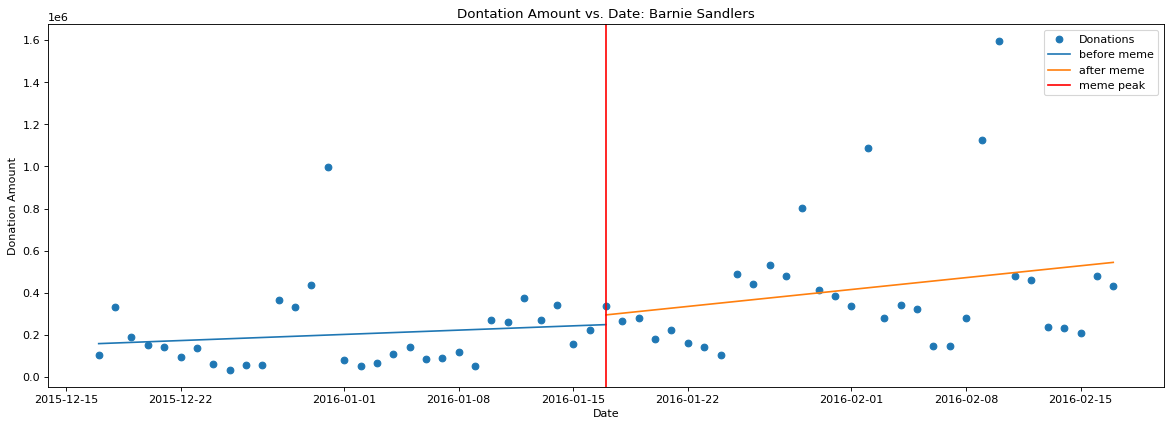

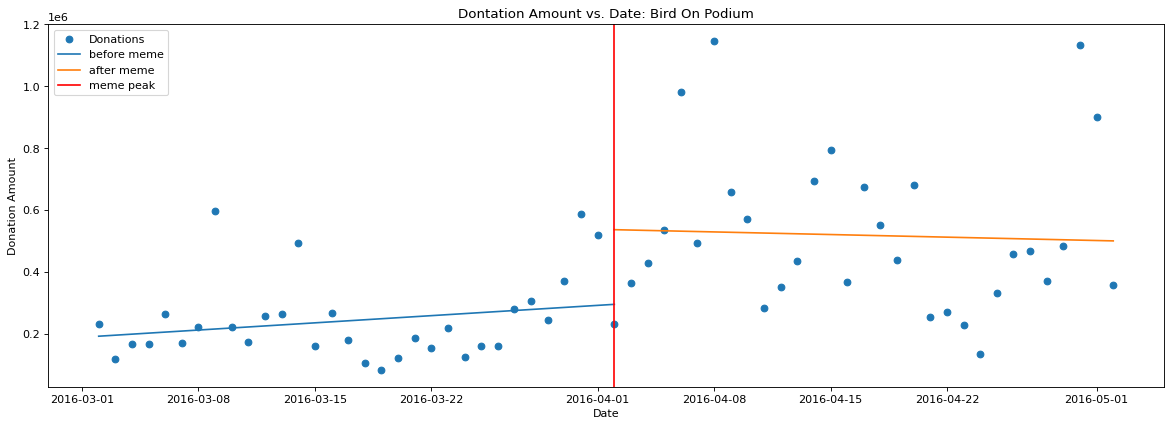

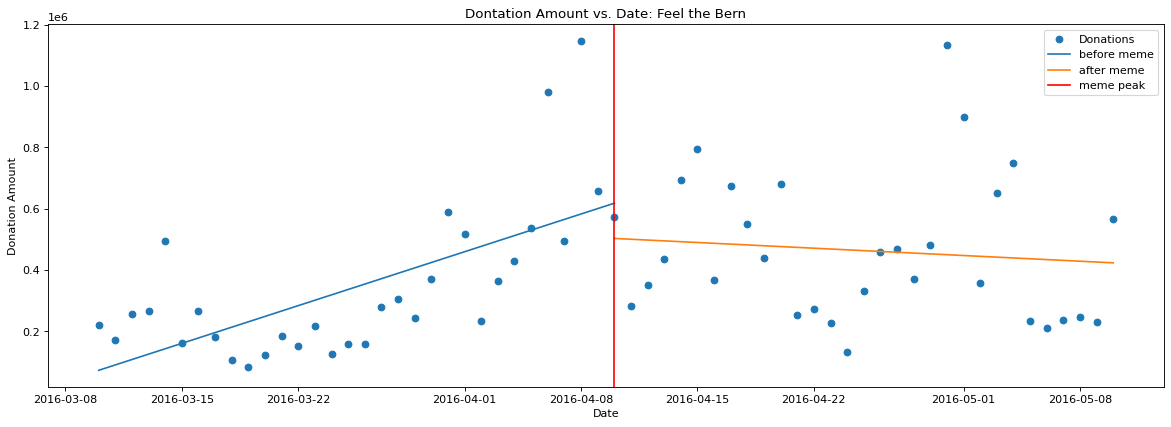

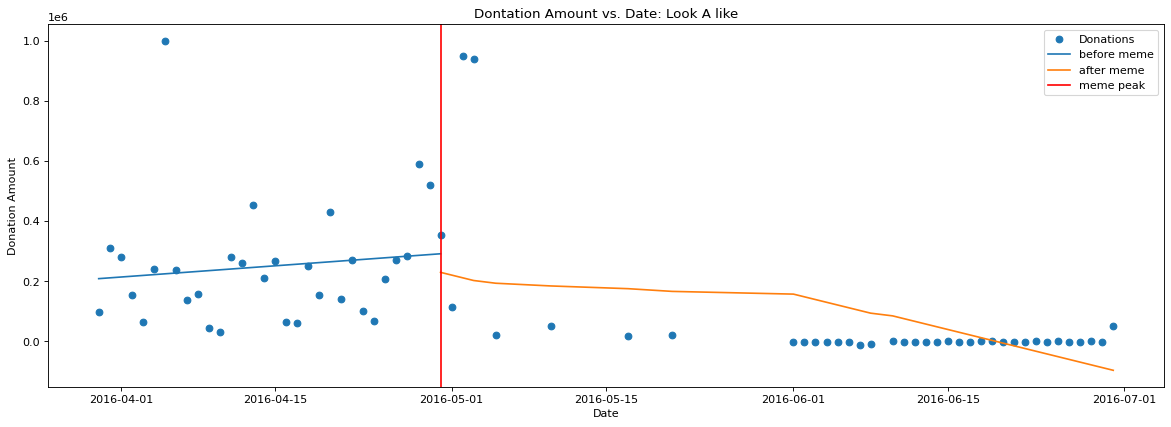

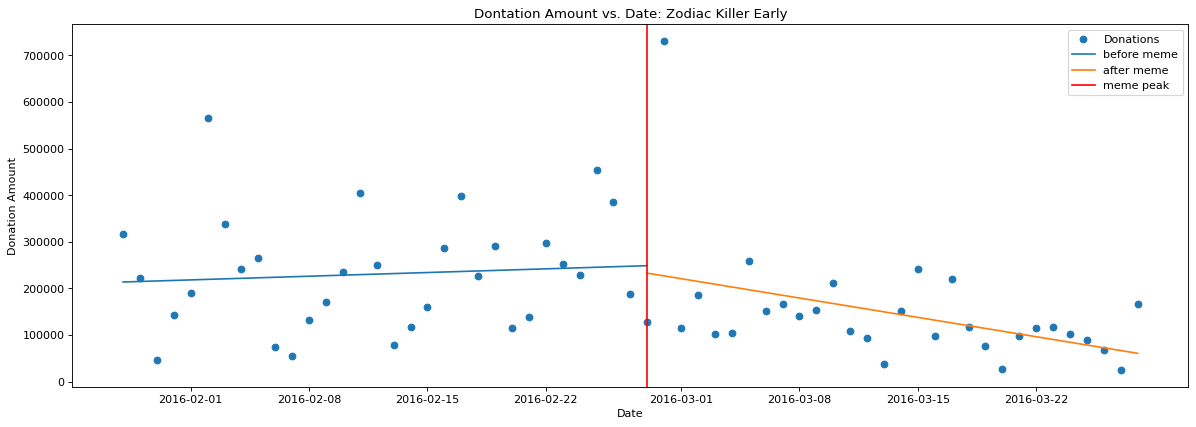

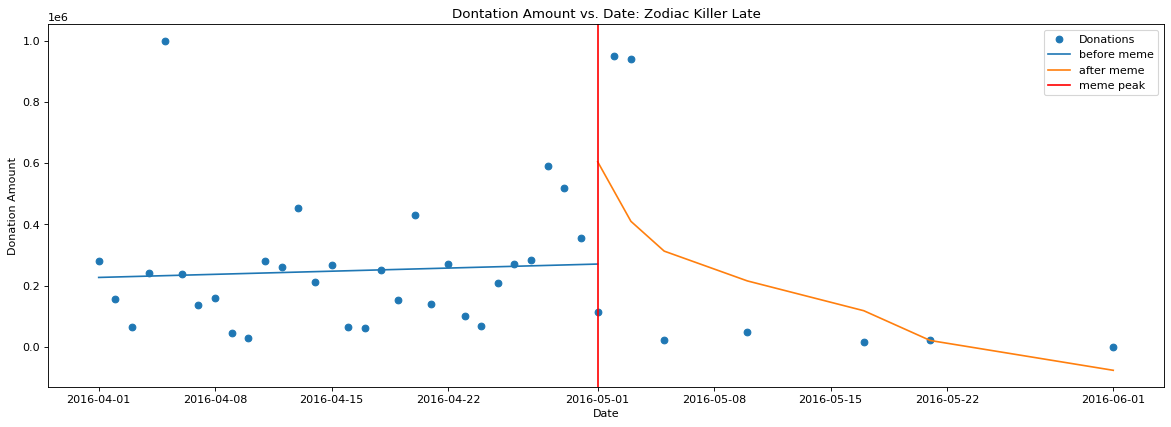

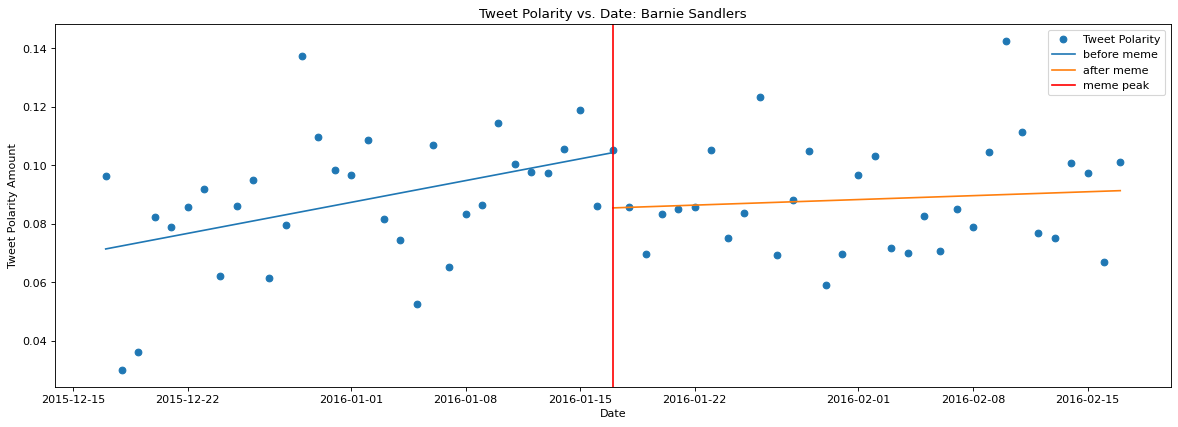

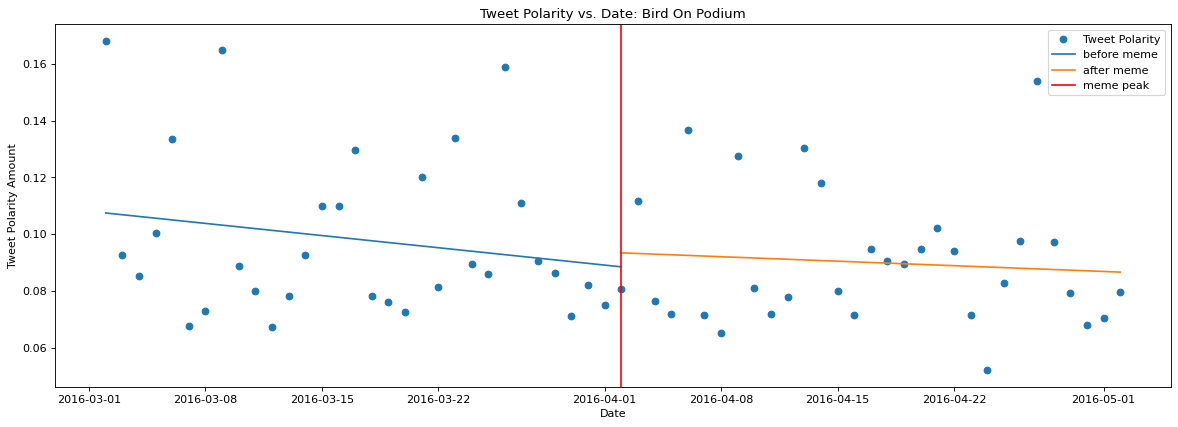

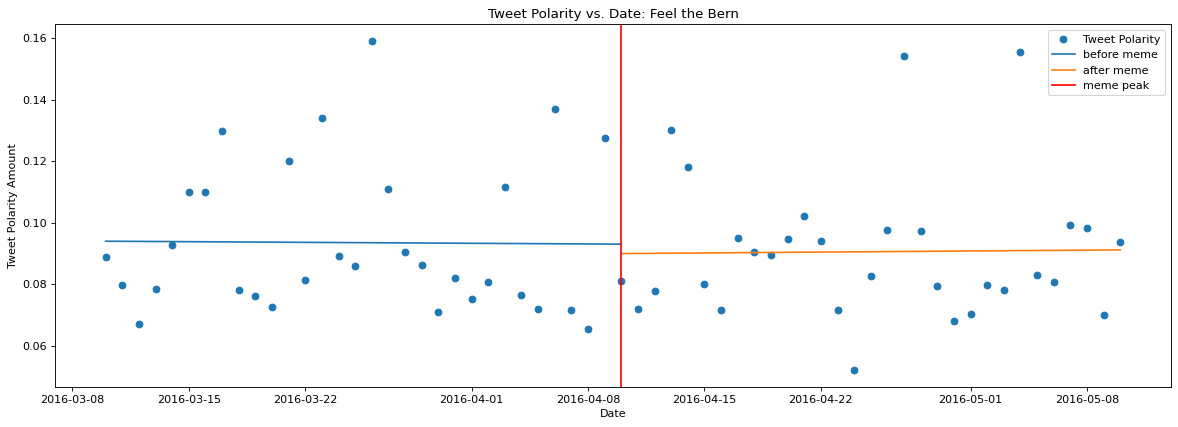

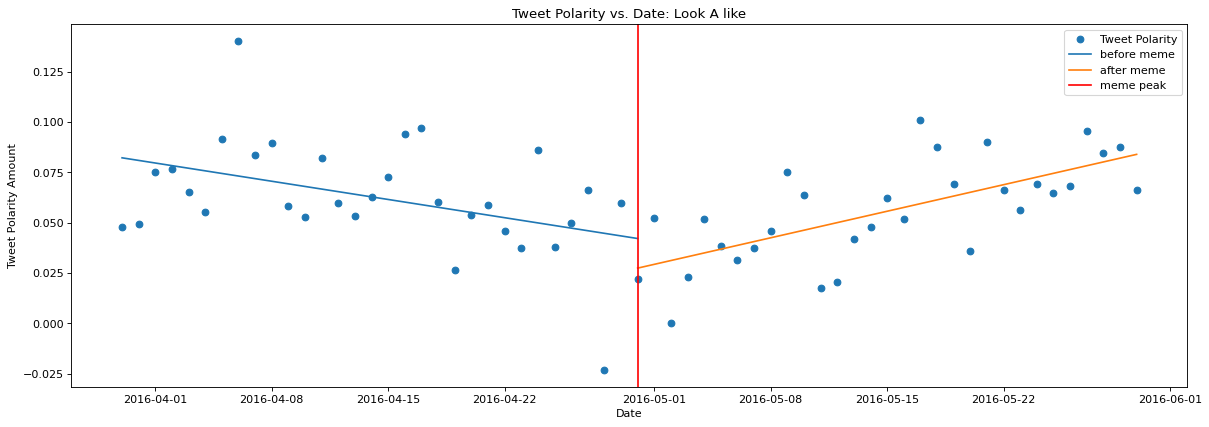

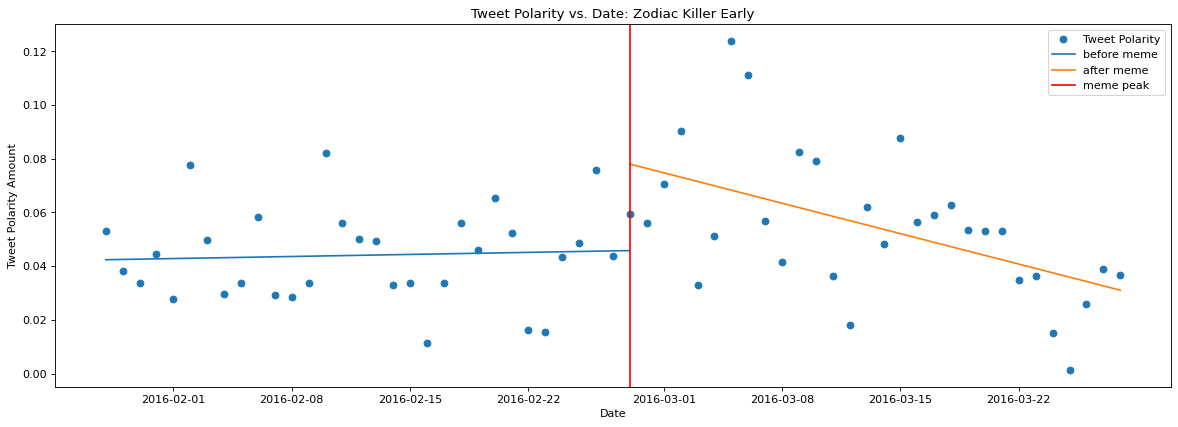

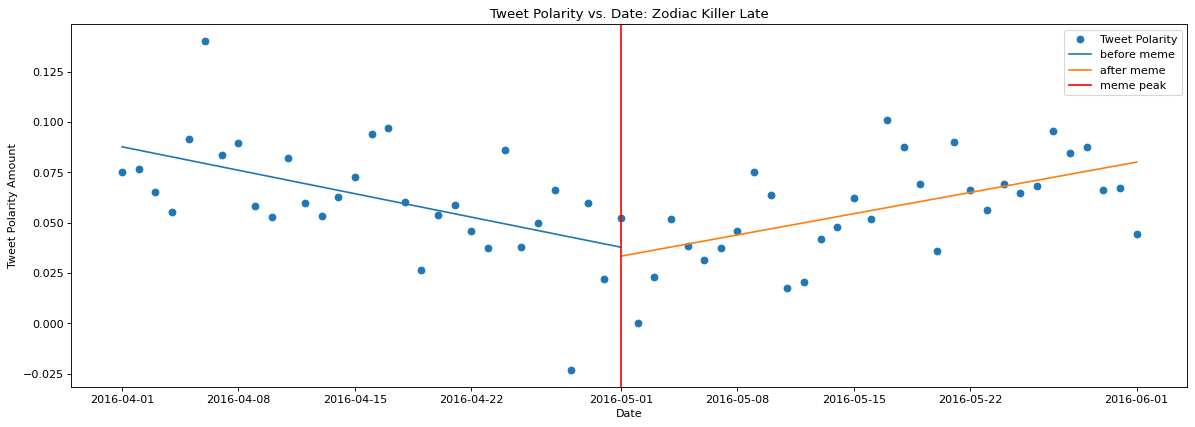

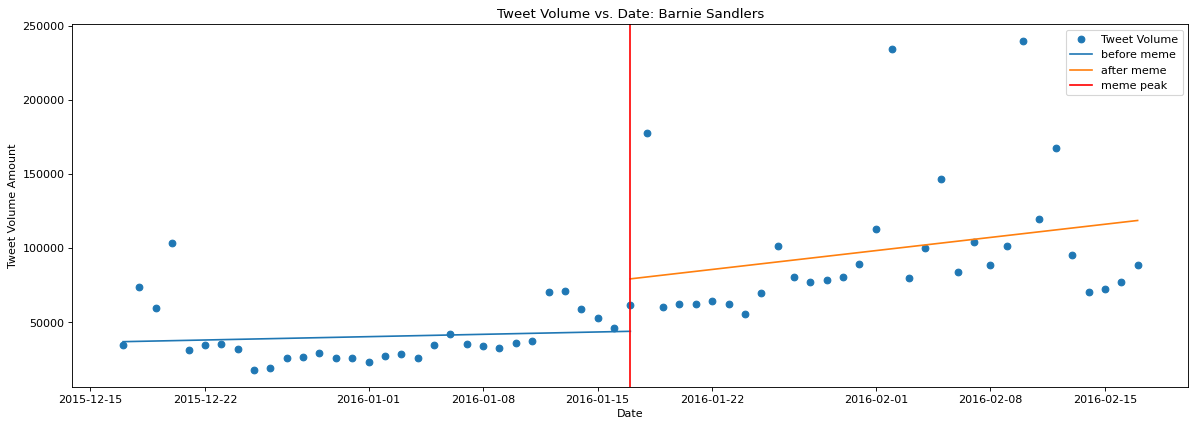

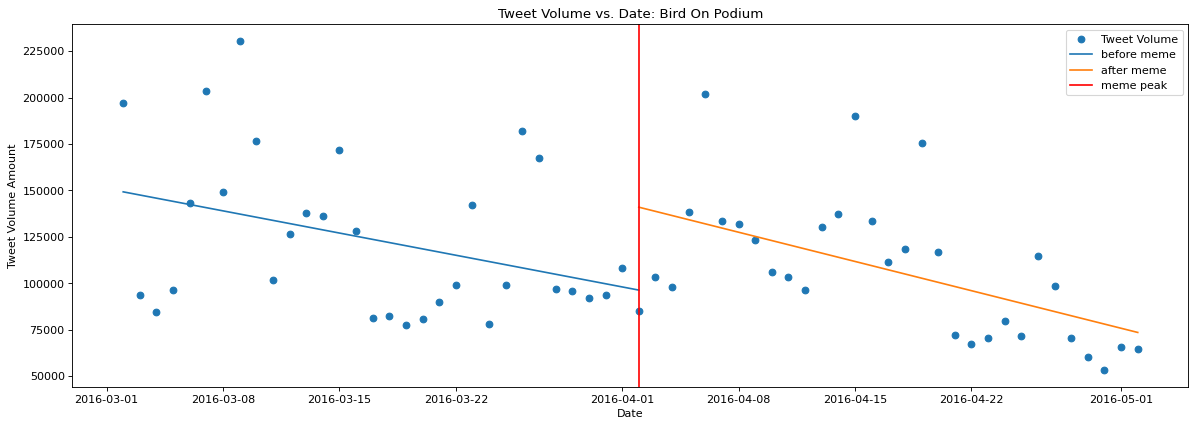

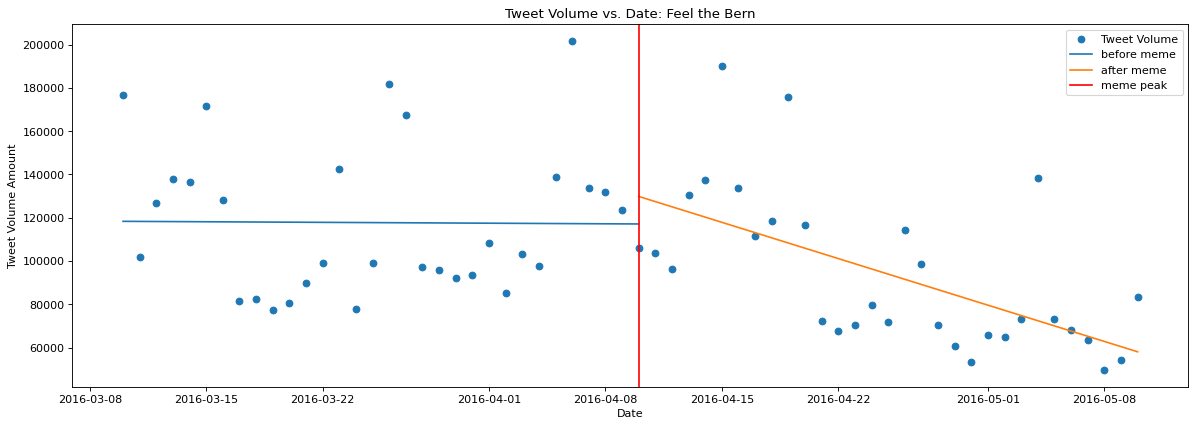

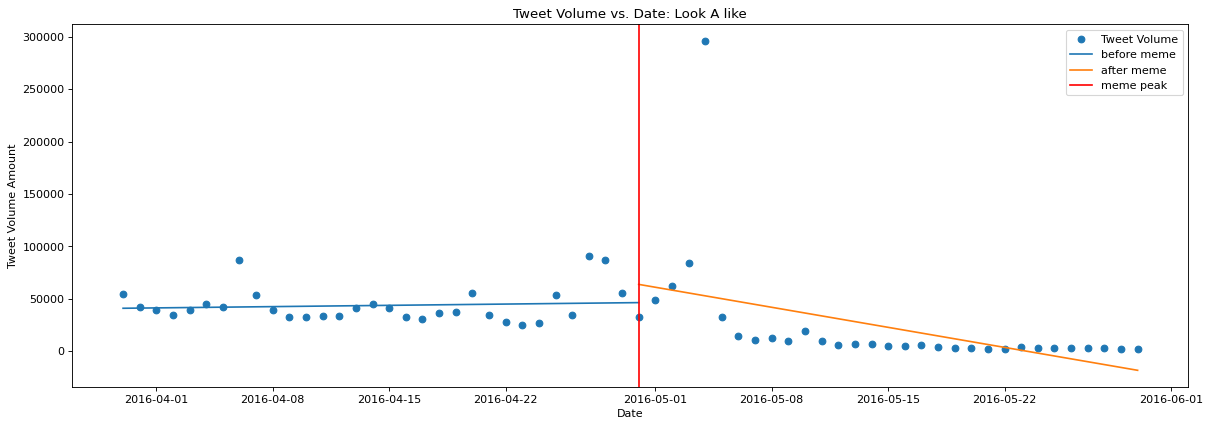

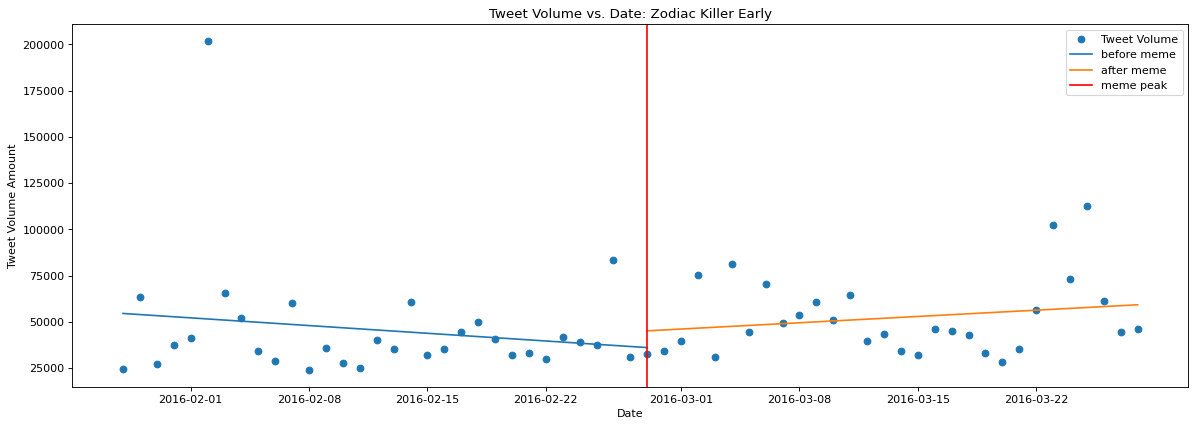

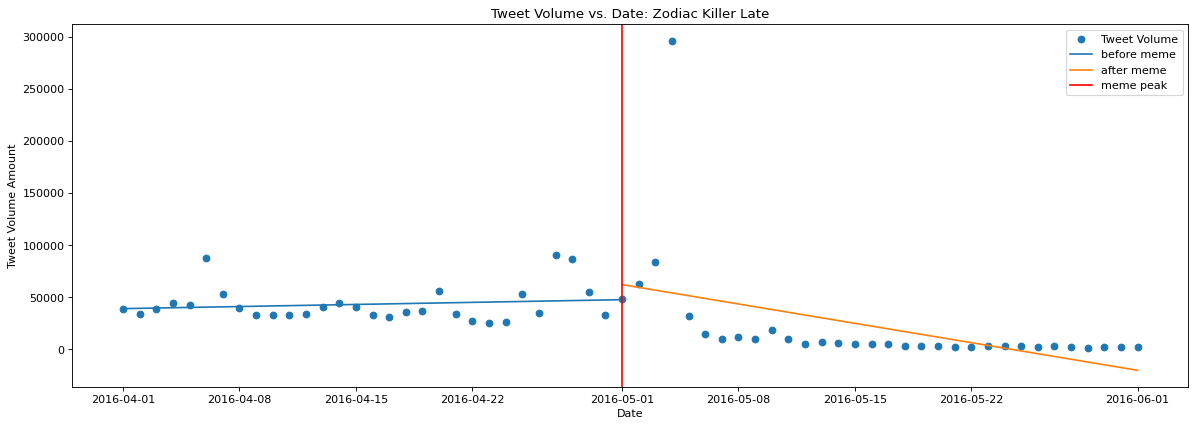

In [50]:
fec_plts = []
for i, df in enumerate(fec_dfs):
    df.sort_values(by="TRANSACTION_DT", inplace=True)
    fig = create_graph(df, "TRANSACTION_DT", "TRANSACTION_AMT", meme_dates[i], fec_labels[i])
    label = f"graphs/{fec_labels[i]['title']}.png"
    fig.savefig(label)
    fec_plts.append(fig)

sent_plts = []
for i,df in enumerate(twitter):
    df.sort_values(by="created_at", inplace=True)
    fig = create_graph(df, "created_at", "polarity", meme_dates[i], sentiment_labels[i])
    label = f"graphs/{sentiment_labels[i]['title']}.png"
    fig.savefig(label)
    sent_plts.append(fig)


vol_plts = []
for i, df in enumerate(volume_dfs):
    df.sort_values(by="start", inplace=True)
    fig = create_graph(df, "start", "tweet_count", meme_dates[i], volume_labels[i])
    label = f"graphs/{volume_labels[i]['title']}.png"
    fig.savefig(label)   
    vol_plts.append(fig)

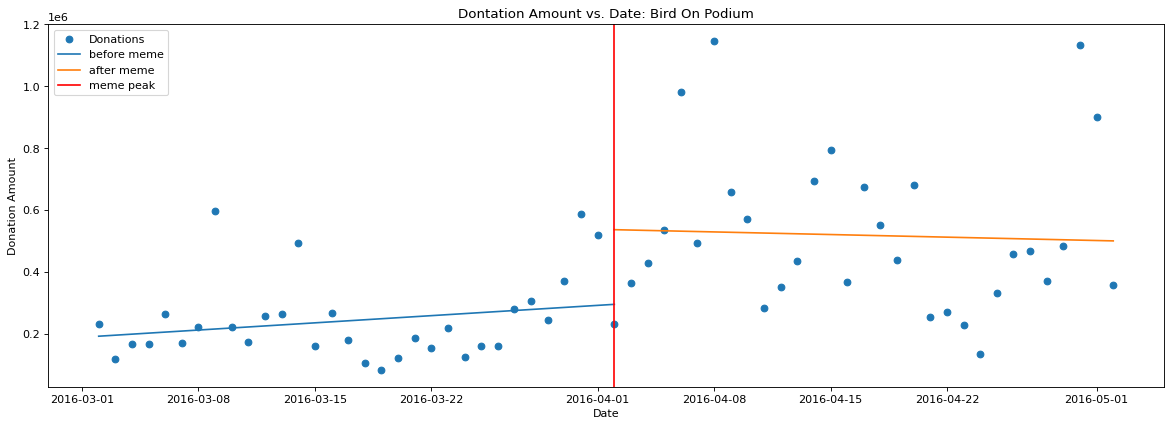

In [47]:
fec_plts

sent_plts
vol_plts

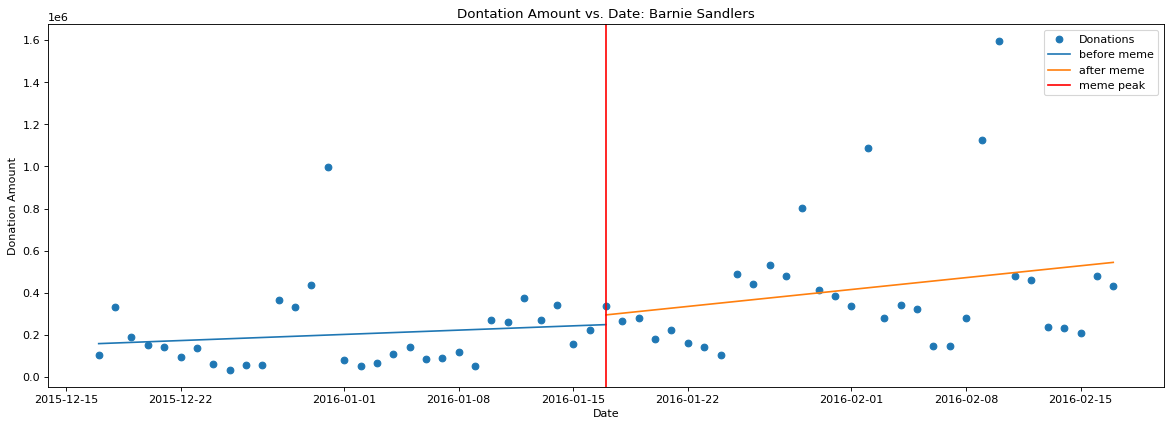